## Balancing a pole using reinforcement learning

Padrick Beggs




In [2]:
#pip installs
!pip install gym
!pip -q install pyglet

In [3]:
#Import Statements

import os
import tensorflow as tf
import numpy as np
import sys
import gym
import keras
import random
from gym import wrappers
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.models import model_from_json
from collections import deque
import abc


#Git Clone
!git clone https://github.com/openai/gym
%cd gym
!pip install -e .


Using TensorFlow backend.


C:\Users\Patri\ENR291\Balancing A Pole\gym


fatal: destination path 'gym' already exists and is not an empty directory.


Obtaining file:///C:/Users/Patri/ENR291/Balancing%20A%20Pole/gym
  Attempting uninstall: gym
    Found existing installation: gym 0.17.1
    Uninstalling gym-0.17.1:
      Successfully uninstalled gym-0.17.1
  Running setup.py develop for gym


This renders an environment with an untrained agent.

In [4]:
#Creates and renders the gym env

env = gym.make('CartPole-v0')
env.reset()

array([ 0.04650944, -0.01485217,  0.02216048,  0.01632254])

In [5]:
#This renders a the cart pole environment without any actions
for _ in range(200):
    env.render()
env.close()
env.reset()

array([ 0.03009867,  0.04772435, -0.04040785,  0.04194285])

In [5]:
#This renders a the cart pole environment with a constant force of 1 to the right. 
for _ in range(200):
    env.render()
    env.step(1)
env.close()
env.reset()

c:\users\patri\enr291\balancing_a_pole\gym\gym\logger.py:30: UserWarning: WARN: You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


array([ 0.0254562 ,  0.01235367, -0.02772468,  0.0185462 ])

In [6]:
#This renders a the cart pole environment with a constant force of 1 to the left. 
for _ in range(200):
    env.render()
    env.step(0)
env.close()
env.reset()

array([ 0.04771221,  0.02133103, -0.04937582, -0.03105041])

In [7]:

#This renders a the cart pole environment with a random force.
for _ in range(200):
    env.render()
    #Takes a random action
    #This action is a shove to the left or to the right. 0 or 1.
    env.step(env.action_space.sample())
    print(env.step(env.action_space.sample())) 
env.close()
env.reset()
#The env.action_space.sample() outputs an array that lists the action the agent decided to take at any given step
#An example is (array([ 0.04725172,  0.37997419, -0.03443973, -0.57368672]), 1.0, False, {})
#The array is the observation of the environment, the 1.0 is the force applied, and the boolean is a check if the envirnment is done or not.

(array([ 0.05248133,  0.02274881, -0.05677471, -0.06238701]), 1.0, False, {})
(array([ 0.049506  , -0.36576154, -0.05378531,  0.48568684]), 1.0, False, {})
(array([ 0.03098907, -0.75457288, -0.02885268,  1.03944096]), 1.0, False, {})
(array([-0.00308838, -0.75407692,  0.01839471,  1.02773272]), 1.0, False, {})
(array([-0.0371587 , -1.1450303 ,  0.06547204,  1.63074666]), 1.0, False, {})
(array([-0.08687645, -1.53687883,  0.13694883,  2.26450317]), 1.0, False, {})
(array([-0.15227383, -1.53969697,  0.23415995,  2.36419681]), 1.0, True, {})
(array([-0.21001385, -1.54388874,  0.32447788,  2.51663045]), 0.0, True, {})
(array([-0.2679427 , -1.16223097,  0.42157719,  2.18030309]), 0.0, True, {})
(array([-0.31064503, -0.78446407,  0.50601241,  1.920742  ]), 0.0, True, {})
(array([-0.34594533, -0.7927482 ,  0.5908375 ,  2.23180736]), 0.0, True, {})
(array([-0.37391627, -0.41961858,  0.67872759,  2.11244913]), 0.0, True, {})
(array([-0.39457717, -0.42725118,  0.77144267,  2.50760854]), 0.0, Tru

(array([ 3.92570335,  3.596946  , 18.76322614,  1.31164903]), 0.0, True, {'TimeLimit.truncated': False})
(array([ 4.07350324,  3.59877983, 18.80932395,  1.26646042]), 0.0, True, {'TimeLimit.truncated': False})
(array([ 4.21356272,  3.59949205, 18.8655787 ,  1.24898217]), 0.0, True, {'TimeLimit.truncated': False})
(array([ 4.36144066,  3.59875666, 18.90978556,  1.26663796]), 0.0, True, {'TimeLimit.truncated': False})
(array([ 4.50147418,  3.20688833, 18.96666949,  1.89565358]), 0.0, True, {'TimeLimit.truncated': False})
(array([ 4.63362319,  3.59356548, 19.03741227,  1.40084797]), 0.0, True, {'TimeLimit.truncated': False})
(array([ 4.78121295,  3.58874943, 19.0888751 ,  1.52416409]), 0.0, True, {'TimeLimit.truncated': False})
(array([ 4.92082139,  3.58303532, 19.15697928,  1.68274753]), 0.0, True, {'TimeLimit.truncated': False})
(array([ 5.0679537 ,  3.96336107, 19.22062015,  1.32936721]), 0.0, True, {'TimeLimit.truncated': False})
(array([ 5.23026978,  4.34089493, 19.27064057,  1.02488

(array([17.44729998,  2.57810497, 17.27246172, -5.7478865 ]), 0.0, True, {'TimeLimit.truncated': False})
(array([17.55345818,  2.51324001, 17.03669504, -6.37158208]), 0.0, True, {'TimeLimit.truncated': False})
(array([17.65685658,  2.79826833, 16.7771547 , -6.8028918 ]), 0.0, True, {'TimeLimit.truncated': False})
(array([17.77161783,  3.08331838, 16.50192488, -7.06666081]), 0.0, True, {'TimeLimit.truncated': False})
(array([17.89037994,  2.6254598 , 16.21025902, -7.9684691 ]), 0.0, True, {'TimeLimit.truncated': False})
(array([17.99853014,  2.95074055, 15.89280684, -7.76469315]), 0.0, True, {'TimeLimit.truncated': False})
(array([18.11239957,  2.54529513, 15.57500443, -8.43013826]), 0.0, True, {'TimeLimit.truncated': False})


array([ 0.04720308,  0.03950907, -0.04600967, -0.02106534])

## Deep Learning using Q-Learning

# 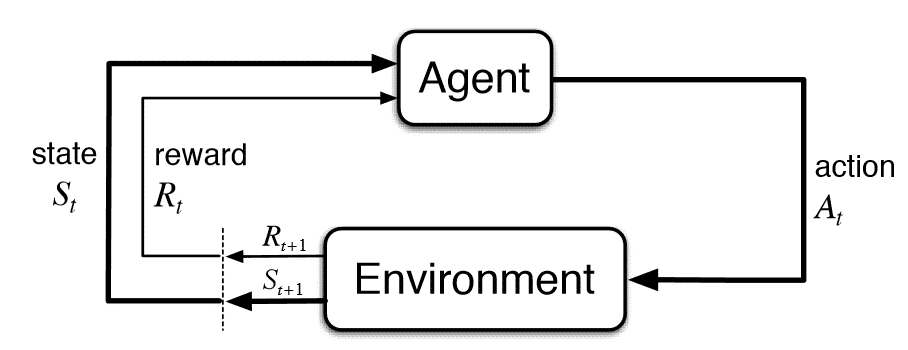

More linear shaped activation functions work better in reinforcement learning.

Things like the sigmoid and hyperbolic tangent functions squish the numbers too much.

Also the model learns by adapting random beneficial movements so a dropout layers are not necessary.

In [30]:
learning_rate = .00145
observation_space = env.observation_space.shape[0]
action_space = env.action_space.n



model = Sequential()

model.add(Dense(24, input_shape=(observation_space,), activation = "relu"))

model.add(Dense(16, input_shape=(observation_space,), activation = "relu"))

model.add(Dense(24, input_shape=(observation_space,), activation = "relu"))

model.add(Dense(action_space, activation = "linear"))

model.compile(loss="mse", optimizer=Adam(lr=learning_rate))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 24)                120       
_________________________________________________________________
dense_12 (Dense)             (None, 16)                400       
_________________________________________________________________
dense_13 (Dense)             (None, 24)                408       
_________________________________________________________________
dense_14 (Dense)             (None, 2)                 50        
Total params: 978
Trainable params: 978
Non-trainable params: 0
_________________________________________________________________


The cell below defines the way the model trains with Q_learning and defines two seperate methods that do about the same thing. The difference being that one stops after a certain number of runs and the other stops after the model becomes constant. 

In [8]:

#Updates the QTable with new data and generating the model 
def updateQTable(batch, model, discount):
    for state, action, reward, state_next, terminal in batch:
        q_update = reward
        if not terminal:
            q_update = (reward + discount * np.amax(model.predict(state_next)[0]))
        q_values = model.predict(state)
        q_values[0][action] = q_update
        model.fit(state, q_values, verbose=0)
    return model



def playWithEpisodes(env, learning_rate, epsilon, discount, decay, memory_size, batch_size, episodes):
    observation_space = env.observation_space.shape[0]
    action_space = env.action_space.n
    memory = deque(maxlen = memory_size)
    
    bestScore = 0
    totalScore = 0
    avScore = 0
    first200 = 0
    numberOf200s = 0
    
    for run in range(episodes):
        s = env.reset()
        s = np.reshape(s, [1, observation_space])
        score = 0
        done = False
        
        while not done:
            env.render()
            if np.random.rand() < epsilon:
                a = random.randrange(action_space)
            else:
                q_values = model.predict(s)
                a = np.argmax(q_values[0])          
            next_s, reward, done, _ = env.step(a)
            next_s = np.reshape(next_s, [1, observation_space])
            memory.append((s, a, reward, next_s, done))
            s = next_s
    
            if len(memory) > batch_size:
                batch = random.sample(memory, batch_size)
                updateQTable(batch, model, discount)
                epsilon *= decay
            score += 1
   

#--------------Crystalizes the intellegence-----------------------
            
            #The if are in the render loop so that the larger the score increases the learning rate lessens. 
            #This is analogous to creating crystallized intellegence. 
            if score > bestScore:
                learning_rate = learning_rate*.998
                bestScore = score
                
        if score == 200 and numberOf200s == 0: 
            learning_rate = learning_rate *.96
            first200 = run
            numberOf200s += 1
            
        elif score == 200:
            learning_rate = learning_rate *.96
            numberOf200s += 1
                

#------------------------------------------------------------------
        totalScore = totalScore + score
        
        
        print ("Run: " + str(run) + ", Score: " + str(score))
        print(learning_rate)
        
        
    print("----SUMMARY----")
    print("The average score was " + str(totalScore/episodes))
    print("The total score was " + str(totalScore))
    print("It hit the max score after "+ str(first200) +" episodes")
    print("The number of max scores was " + str(numberOf200s))
    
    env.close()
    
    
    
def playTilDone(env, learning_rate, epsilon, discount, decay, memory_size, batch_size, whenDone):
    observation_space = env.observation_space.shape[0]
    action_space = env.action_space.n
    memory = deque(maxlen=memory_size)
    
    episodeCount=1
    bestScore = 0
    totalScore = 0
    avScore = 0
    first200 = 0
    numberOf200s = 0
    consistant = 0
    
    while consistant != whenDone:
        s = env.reset()
        s = np.reshape(s, [1, observation_space])
        score = 0
        done = False
        
        while not done:
            env.render()
            if np.random.rand() < epsilon:
                a = random.randrange(action_space)
            else:
                q_values = model.predict(s)
                a = np.argmax(q_values[0])          
            next_s, reward, done, _ = env.step(a)
            next_s = np.reshape(next_s, [1, observation_space])
            memory.append((s, a, reward, next_s, done))
            s = next_s
    
            if len(memory) > batch_size:
                batch = random.sample(memory, batch_size)
                updateQTable(batch, model, discount)
                epsilon *= decay
            score += 1
            
#--------------Crystalizes the intellegence-----------------------

            #The if are in the render loop so that the larger the score increases the learning rate lessens. 
            #This is analogous to creating crystallized intellegence. 
            if score > bestScore:
                learning_rate = learning_rate*.998
                bestScore = score
                
        if score == 200 and numberOf200s == 0: 
            learning_rate = learning_rate *.97
            first200 = episodeCount
            numberOf200s += 1
            consistant += 1
            
        elif score == 200:
            learning_rate = learning_rate *.97
            numberOf200s += 1
            consistant += 1
        else:
            consistant = 0
#-----------------------------------------------------------------

        totalScore = totalScore + score
        
        
        #If the model does not learn and the learning rate becomes too low,
        #Every 350 episodes this will inject youth into the model. 
        if (episodeCount+1)%350 == 1:
            learning_rate = learning_rate * 4
        
        
        print ("Run: " + str(episodeCount) + ", Score: " + str(score))
        print(learning_rate)
        episodeCount += 1
        
        
    print("----SUMMARY----")
    print("The average score was " + str(totalScore/episodeCount))
    print("The total score was " + str(totalScore))
    print("It hit the max score after "+ str(first200) +" episodes")
    print("The number of max scores was " + str(numberOf200s))
    print("The total number of episodes was " + str(episodeCount))
    env.close()
    


Q-Learning follows this formula to optimize it's Q-table to, in this case, balance a pole on a cart.

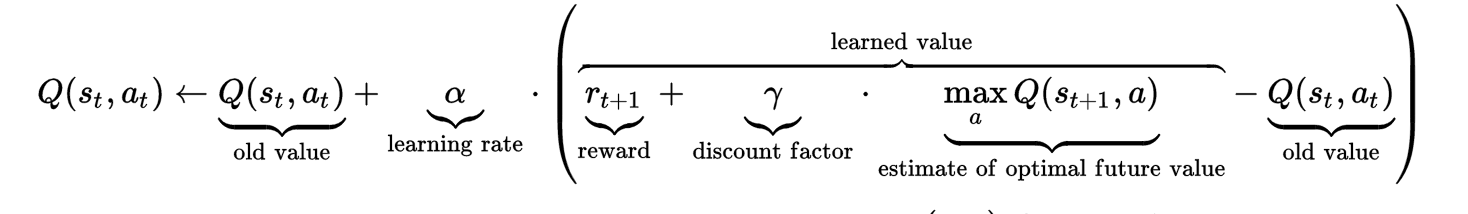

To emulate how a person learns, I made the learning rate a function of the previous score. If the score is greater than the best score recorded it starts applying a continuous decrease in the learning rate. This decrease ends when that episode is over. The learning rate also decreases when it hits the max possible score. This function was meant to map to the notions of neuroplasticity and crystallized intelligence. When we are young, our ability to learn is in its prime. As we age, our neuroplasticity begins to diminish, but a new advantage emerges. Crystalized intelligence takes forefront and things you have learned in the past that your brain, or neural network, deemed useful gets strengthened and resist change.

In [9]:
    
#This creates the CartPole environment. 
env = gym.make("CartPole-v0")

#Instanciates all variables needed for learning.


epsilon = .95
discount = .95
decay = .995
memory_size = 1000000
batch_size = 20
episodes = 1
whenDone = 1


#Executes the simulation in 2 fashions:

#playWithEpisodes(env, learning_rate, epsilon, discount, decay, memory_size, batch_size, episodes)

print()
print("===================================================")
print()

playTilDone(env, learning_rate, epsilon, discount, decay, memory_size, batch_size, whenDone)



Run: 1, Score: 12
0.0014155802594473367
Run: 2, Score: 13
0.001412749098928442
Run: 3, Score: 20
0.001393088887688197
Run: 4, Score: 23
0.001384747060284009
Run: 5, Score: 11
0.001384747060284009
Run: 6, Score: 20
0.001384747060284009
Run: 7, Score: 11
0.001384747060284009
Run: 8, Score: 17
0.001384747060284009
Run: 9, Score: 9
0.001384747060284009
Run: 10, Score: 17
0.001384747060284009
Run: 11, Score: 9
0.001384747060284009
Run: 12, Score: 12
0.001384747060284009
Run: 13, Score: 12
0.001384747060284009
Run: 14, Score: 11
0.001384747060284009
Run: 15, Score: 9
0.001384747060284009
Run: 16, Score: 12
0.001384747060284009
Run: 17, Score: 12
0.001384747060284009
Run: 18, Score: 10
0.001384747060284009
Run: 19, Score: 9
0.001384747060284009
Run: 20, Score: 12
0.001384747060284009
Run: 21, Score: 11
0.001384747060284009
Run: 22, Score: 11
0.001384747060284009
Run: 23, Score: 10
0.001384747060284009
Run: 24, Score: 8
0.001384747060284009
Run: 25, Score: 15
0.001384747060284009
Run: 26, Sc

In [28]:
observation_space = env.observation_space.shape[0]
action_space = env.action_space.n
memory = deque(maxlen=memory_size)
s = env.reset()
s = np.reshape(s, [1, observation_space])
done = False

while not done:
            env.render()
            if np.random.rand() < epsilon:
                a = random.randrange(action_space)
            else:
                q_values = model.predict(s)
                a = np.argmax(q_values[0])          
            next_s, reward, done, _ = env.step(a)
           
            
            
env.close()

## Citations

Professor at the County College of Morris, Joshua Denholtz

Openai Gym:

https://gym.openai.com/envs/#classic_control

The aging mind: neuroplasticity in response to cognitive training:

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3622463/